In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df=df.drop('Serial No.',axis=1)
df.shape

(500, 8)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df['Chance of Admit ']=[1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()
                       

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [9]:
X = df[['GRE Score', 'CGPA']]
y = df['Chance of Admit ']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("\nData Split Completed:")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Data Split Completed:
x_train shape: (375, 2)
x_test shape: (125, 2)
y_train shape: (375,)
y_test shape: (125,)


In [10]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [12]:
y_pred = dt_model.predict(x_test)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Evaluation:
Accuracy: 0.888

Confusion Matrix:
 [[63 10]
 [ 4 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90        73
           1       0.83      0.92      0.87        52

    accuracy                           0.89       125
   macro avg       0.88      0.89      0.89       125
weighted avg       0.89      0.89      0.89       125



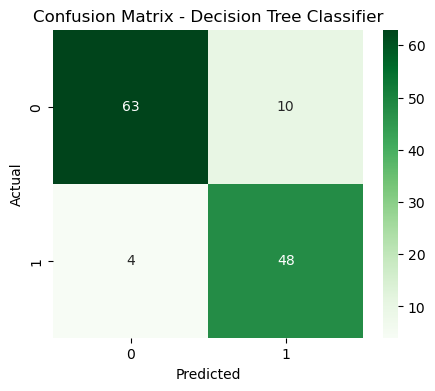

In [36]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

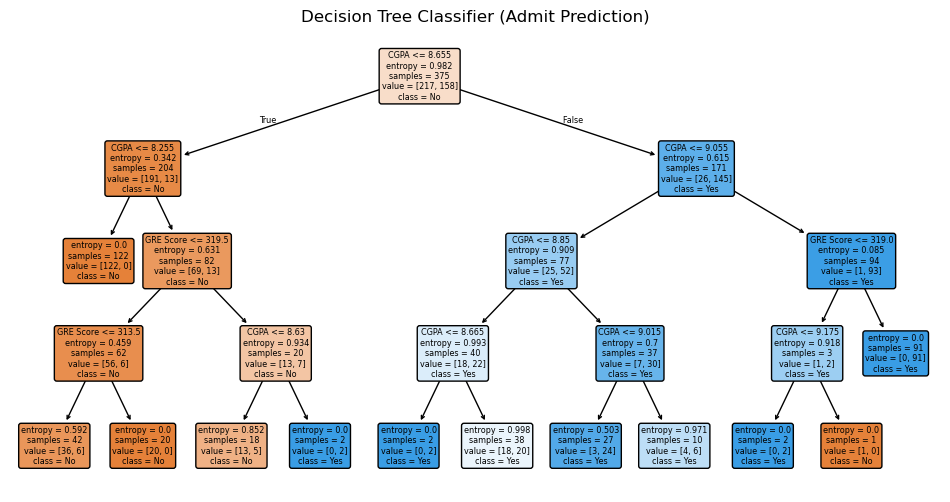

In [37]:
plt.figure(figsize=(12,6))
plot_tree(dt_model, feature_names=['GRE Score', 'CGPA'], class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Classifier (Admit Prediction)")
plt.show()
